### Study relationship between weather and COVID case

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.api as sm
from patsy import dmatrices

### Read in Files

In [3]:
patient = pd.read_csv(".\Raw_Data\PatientInfo.csv")
weather = pd.read_csv(".\Raw_Data\Weather.csv")

In [4]:
print(patient.shape)
print(patient.isnull().sum())
patient[:5]

(5165, 14)
patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
print(weather.shape)
print(weather.isnull().sum())
weather[:5]

(26271, 10)
code                      0
province                  0
date                      0
avg_temp                 15
min_temp                  5
max_temp                  3
precipitation             0
max_wind_speed            9
most_wind_direction      29
avg_relative_humidity    20
dtype: int64


,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


### Try focusing on one geo location for weather study

In [6]:
patient.province.value_counts()

Seoul                1312
Gyeongsangbuk-do     1254
Gyeonggi-do          1208
Incheon               343
Chungcheongnam-do     168
Busan                 151
Daegu                 137
Gyeongsangnam-do      133
Daejeon               119
Gangwon-do             63
Chungcheongbuk-do      56
Ulsan                  55
Sejong                 51
Gwangju                44
Jeollabuk-do           27
Jeollanam-do           25
Jeju-do                19
Name: province, dtype: int64

In [7]:
seoul_patient = patient[patient.province=="Seoul"]
seoul_patient = seoul_patient[["city","confirmed_date","infection_case"]]
seoul_patient

,city,confirmed_date,infection_case
0,Gangseo-gu,2020-01-23,overseas inflow
1,Jungnang-gu,2020-01-30,overseas inflow
2,Jongno-gu,2020-01-30,contact with patient
3,Mapo-gu,2020-01-30,overseas inflow
4,Seongbuk-gu,2020-01-31,contact with patient
...,...,...,...
1307,Mapo-gu,2020-06-29,Richway
1308,Mapo-gu,2020-06-29,Richway
1309,Geumcheon-gu,2020-06-29,contact with patient
1310,etc,2020-06-29,NaN


In [8]:
daily_infection_seoul = seoul_patient.groupby(by="confirmed_date").count()['infection_case']
daily_infection_seoul

confirmed_date
2020-01-23     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
              ..
2020-06-25    16
2020-06-26    17
2020-06-27    11
2020-06-28     6
2020-06-29     5
Name: infection_case, Length: 129, dtype: int64

In [9]:
seoul_weather = weather[weather.province == "Seoul"].fillna(method="ffill")
seoul_weather

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
16,10000,Seoul,2016-01-02,5.7,1.0,9.5,0.0,4.5,320.0,76.9
32,10000,Seoul,2016-01-03,6.5,5.1,9.4,0.0,4.0,320.0,80.6
48,10000,Seoul,2016-01-04,2.0,-2.5,5.3,0.0,5.1,320.0,54.4
64,10000,Seoul,2016-01-05,-2.7,-4.8,1.5,0.0,4.6,20.0,39.4
...,...,...,...,...,...,...,...,...,...,...
26191,10000,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,180.0,91.0
26207,10000,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,230.0,82.1
26223,10000,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,250.0,70.4
26239,10000,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,270.0,70.5


In [10]:
seoul_weather_patient = seoul_weather.merge(daily_infection_seoul,left_on="date",right_on="confirmed_date")
seoul_weather_patient = seoul_weather_patient.loc[:, seoul_weather_patient.columns != 'code']

In [11]:
seoul_weather_patient

,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,infection_case
0,Seoul,2020-01-23,4.6,0.0,9.9,0.0,4.7,290.0,49.3,1
1,Seoul,2020-01-30,5.2,1.4,10.4,0.0,3.0,70.0,47.0,3
2,Seoul,2020-01-31,3.9,1.4,8.9,0.0,4.4,270.0,59.6,3
3,Seoul,2020-02-02,1.5,-2.1,5.3,0.0,4.7,290.0,52.3,1
4,Seoul,2020-02-05,-8.3,-11.0,-4.9,0.0,5.5,320.0,37.3,2
...,...,...,...,...,...,...,...,...,...,...
124,Seoul,2020-06-25,21.6,20.1,23.4,13.3,4.3,180.0,91.0,16
125,Seoul,2020-06-26,21.8,19.2,25.7,2.1,5.3,230.0,82.1,17
126,Seoul,2020-06-27,24.1,20.4,29.6,0.0,5.4,250.0,70.4,11
127,Seoul,2020-06-28,25.2,21.5,30.1,0.0,4.7,270.0,70.5,6


## Modeling

Becuase the covid symtom is shown up to 14 days, so we produce several moving average for linear regression.

In [12]:
seoul_weather_patient.date = pd.to_datetime(seoul_weather_patient.date)
seoul_weather_patient = seoul_weather_patient.set_index("date")

In [13]:
seoul_weather_patient["moving_avg_3"] = round(seoul_weather_patient['infection_case'].rolling(window=3, min_periods=2).mean())
seoul_weather_patient["moving_avg_6"] = round(seoul_weather_patient['infection_case'].rolling(window=6, min_periods=3).mean())
seoul_weather_patient["moving_avg_9"] = round(seoul_weather_patient['infection_case'].rolling(window=9, min_periods=4).mean())
seoul_weather_patient["moving_avg_13"] = round(seoul_weather_patient['infection_case'].rolling(window=13, min_periods=5).mean())
seoul_weather_patient.fillna(0)


,province,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,infection_case,moving_avg_3,moving_avg_6,moving_avg_9,moving_avg_13
date,,,,,,,,,,,,,
2020-01-23,Seoul,4.6,0.0,9.9,0.0,4.7,290.0,49.3,1,0.0,0.0,0.0,0.0
2020-01-30,Seoul,5.2,1.4,10.4,0.0,3.0,70.0,47.0,3,2.0,0.0,0.0,0.0
2020-01-31,Seoul,3.9,1.4,8.9,0.0,4.4,270.0,59.6,3,2.0,2.0,0.0,0.0
2020-02-02,Seoul,1.5,-2.1,5.3,0.0,4.7,290.0,52.3,1,2.0,2.0,2.0,0.0
2020-02-05,Seoul,-8.3,-11.0,-4.9,0.0,5.5,320.0,37.3,2,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,Seoul,21.6,20.1,23.4,13.3,4.3,180.0,91.0,16,10.0,8.0,11.0,10.0
2020-06-26,Seoul,21.8,19.2,25.7,2.1,5.3,230.0,82.1,17,13.0,9.0,11.0,11.0
2020-06-27,Seoul,24.1,20.4,29.6,0.0,5.4,250.0,70.4,11,15.0,10.0,10.0,11.0


### Linear Regression on avg_temp and patient count

In [14]:
y, X = dmatrices('moving_avg_3 ~ avg_temp', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           moving_avg_3   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     7.342
Date:                Sat, 08 Aug 2020   Prob (F-statistic):            0.00767
Time:                        00:09:07   Log-Likelihood:                -415.15
No. Observations:                 128   AIC:                             834.3
Df Residuals:                     126   BIC:                             840.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9716      1.089      6.400      0.0

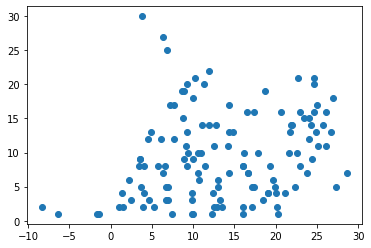

In [15]:
tmp = seoul_weather_patient[["moving_avg_3","avg_temp"]].sort_values(by="moving_avg_3")
plot(tmp.avg_temp,tmp.moving_avg_3,linestyle='None',marker="o")

In [16]:
y, X = dmatrices('moving_avg_6 ~ avg_temp', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           moving_avg_6   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     9.521
Date:                Sat, 08 Aug 2020   Prob (F-statistic):            0.00250
Time:                        00:09:07   Log-Likelihood:                -390.27
No. Observations:                 127   AIC:                             784.5
Df Residuals:                     125   BIC:                             790.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0068      0.926      7.568      0.0

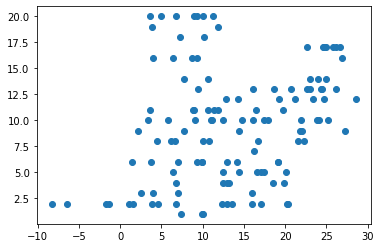

In [17]:
tmp = seoul_weather_patient[["moving_avg_6","avg_temp"]].sort_values(by="moving_avg_6")
plot(tmp.avg_temp,tmp.moving_avg_6,linestyle='None',marker="o")

In [18]:
y, X = dmatrices('moving_avg_13 ~ avg_temp', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          moving_avg_13   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     15.38
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           0.000145
Time:                        00:09:07   Log-Likelihood:                -361.23
No. Observations:                 125   AIC:                             726.5
Df Residuals:                     123   BIC:                             732.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6763      0.789      8.462      0.0

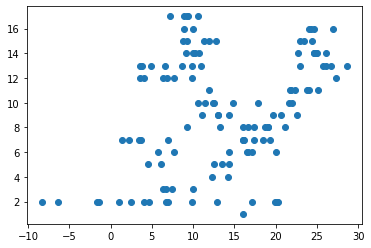

In [19]:
tmp = seoul_weather_patient[["moving_avg_13","avg_temp"]].sort_values(by="moving_avg_13")
plot(tmp.avg_temp,tmp.moving_avg_13,linestyle='None',marker="o")

### Multiple Linear Regression

In [21]:
y, X = dmatrices('moving_avg_3 ~ avg_temp + min_temp + max_temp + precipitation + max_wind_speed + avg_relative_humidity', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           moving_avg_3   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.524
Date:                Sat, 08 Aug 2020   Prob (F-statistic):             0.0245
Time:                        00:12:00   Log-Likelihood:                -411.23
No. Observations:                 128   AIC:                             836.5
Df Residuals:                     121   BIC:                             856.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.76

In [25]:
y, X = dmatrices('moving_avg_13 ~ avg_temp + min_temp + max_temp + precipitation + max_wind_speed + avg_relative_humidity', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          moving_avg_13   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     9.013
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           4.19e-08
Time:                        00:13:25   Log-Likelihood:                -345.01
No. Observations:                 125   AIC:                             704.0
Df Residuals:                     118   BIC:                             723.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                13.96

There is no any strong relationship between weather and infected case numebrs. The R2 increase as use average of longer term, but that is most likely due to a decrease in y variance. I choose to use shift to analyze the delayed affect on covid cases.

In [30]:
case_count = seoul_weather_patient.infection_case
seoul_weather_patient["delay_5"] = case_count.shift(5)
seoul_weather_patient["delay_12"] = case_count.shift(12)

In [27]:
y, X = dmatrices('delay_5 ~ avg_temp + min_temp + max_temp + precipitation + max_wind_speed + avg_relative_humidity', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                delay_5   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     4.554
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           0.000347
Time:                        00:23:15   Log-Likelihood:                -412.98
No. Observations:                 124   AIC:                             840.0
Df Residuals:                     117   BIC:                             859.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.88

In [29]:
y, X = dmatrices('delay_12 ~ avg_temp + min_temp + max_temp + precipitation + max_wind_speed + avg_relative_humidity', data=seoul_weather_patient, return_type='dataframe')
model = sm.OLS(y, X)       
result = model.fit()       
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               delay_12   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4.635
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           0.000309
Time:                        00:24:35   Log-Likelihood:                -391.16
No. Observations:                 117   AIC:                             796.3
Df Residuals:                     110   BIC:                             815.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                17.35

#### avg_relative_humidity seems to have a stronger negative relationship.


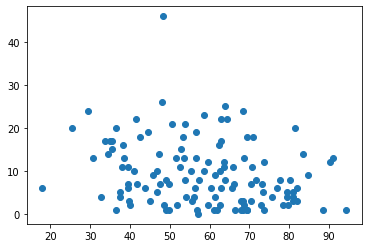

In [32]:
tmp = seoul_weather_patient[["delay_5","avg_relative_humidity"]].sort_values(by="avg_relative_humidity")
plot(tmp.avg_relative_humidity,tmp.delay_5,linestyle='None',marker="o")

When humidity is higher, aerosols are heavier and larger. Thus, they lands to the grounds quicker, reducing the risk of contacting other people. 

Michael P. Ward et al， The Role of Climate During the COVID‐19 epidemic in New South Wales， Australia， Transboundary and Emerging Diseases (2020). DOI： 10.1111/tbed.13631

### Does it mean that the city with higher humidity has less people get infected?